<a href="https://colab.research.google.com/github/priyal6/ML/blob/main/Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data)

In [4]:
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target'] = iris.target

In [6]:
column_mapping={
    0: 'sepal_length',
    1: 'sepal_width',
    2: 'petal_length',
    3: 'petal_width',
    4: 'target'
}

In [7]:
df = df.rename(columns= column_mapping)

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df['species'] = iris.target

In [10]:
df['species'] = df['species'].map({0: 'setosa',1: 'versicolor', 2: 'virginica'})

In [11]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
 5   species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [13]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


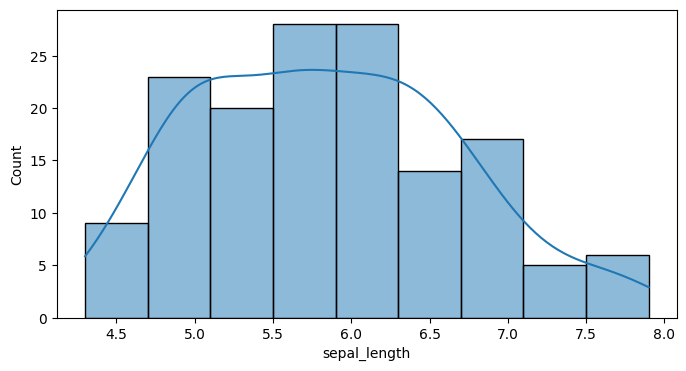

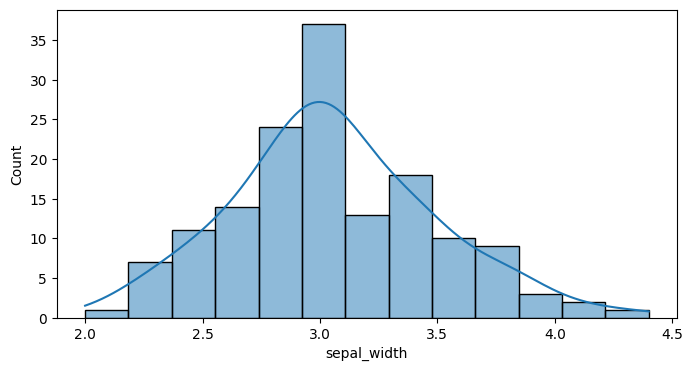

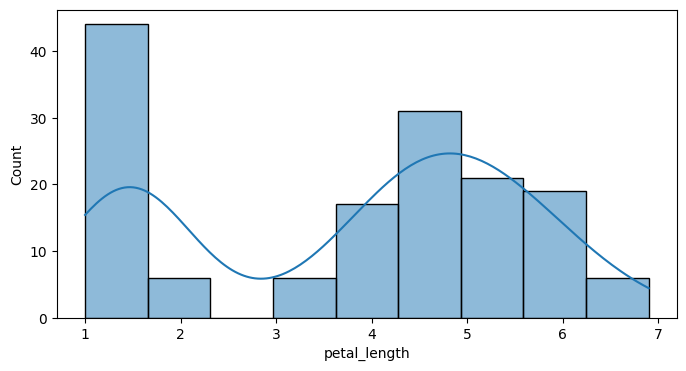

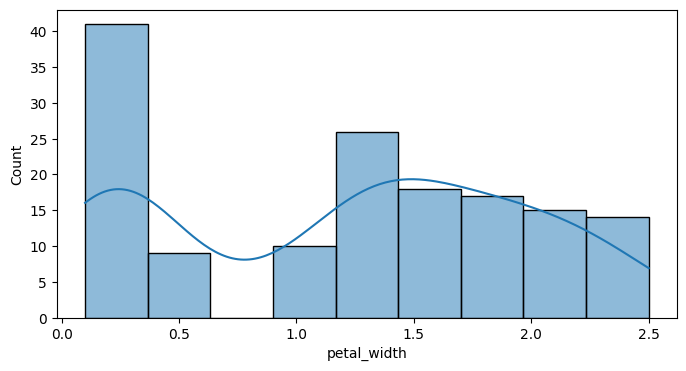

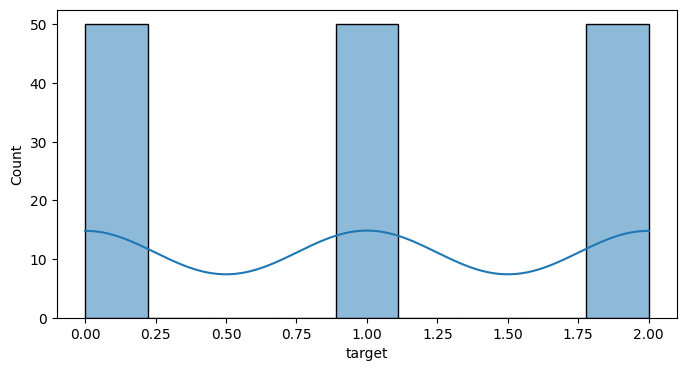

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
for column in df.columns[:-1]:
  plt.figure(figsize=(8,4))
  sns.histplot(df[column],kde=True)
  plt.show()

In [15]:
df["sepal_length"] = df["sepal_length"].astype(float)

In [16]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [17]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(df[['species']])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(['species']))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [18]:
df = pd.concat([df.drop(columns = ['species']),one_hot_encoded_df],axis = 1)

In [19]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,0,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,0,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,0,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,0,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,0,1.0,0.0,0.0


In [20]:
correlation_matrix = df.corr()
print(correlation_matrix)

                    sepal_length  sepal_width  petal_length  petal_width  \
sepal_length            1.000000    -0.117570      0.871754     0.817941   
sepal_width            -0.117570     1.000000     -0.428440    -0.366126   
petal_length            0.871754    -0.428440      1.000000     0.962865   
petal_width             0.817941    -0.366126      0.962865     1.000000   
target                  0.782561    -0.426658      0.949035     0.956547   
species_setosa         -0.717416     0.603348     -0.922765    -0.887344   
species_versicolor      0.079396    -0.467703      0.201754     0.117899   
species_virginica       0.638020    -0.135645      0.721011     0.769445   

                          target  species_setosa  species_versicolor  \
sepal_length        7.825612e-01       -0.717416        7.939552e-02   
sepal_width        -4.266576e-01        0.603348       -4.677031e-01   
petal_length        9.490347e-01       -0.922765        2.017545e-01   
petal_width         9.56547

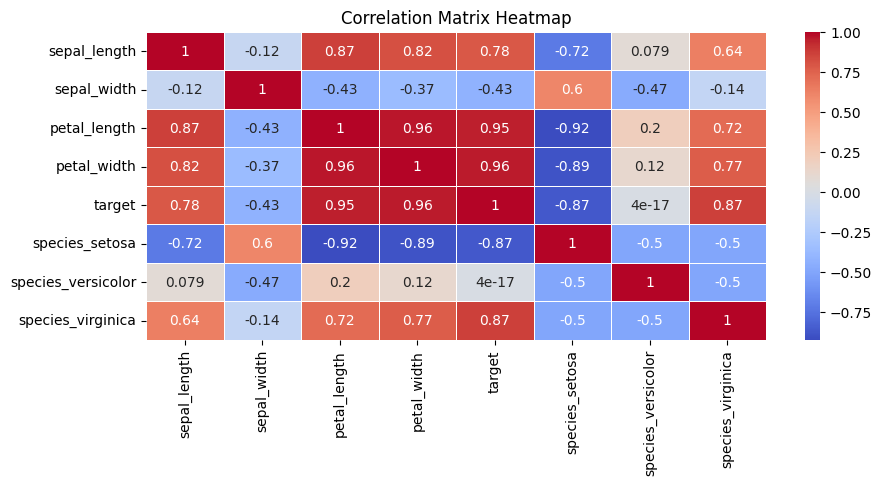

In [21]:
plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


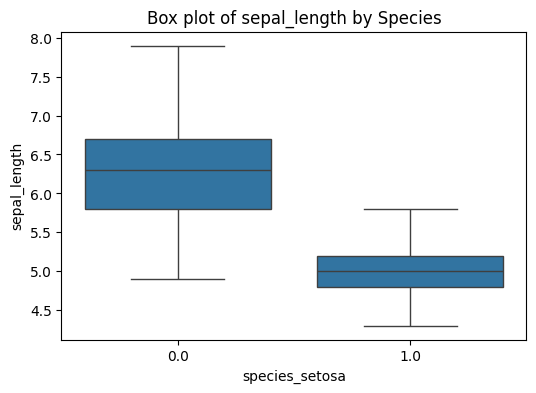

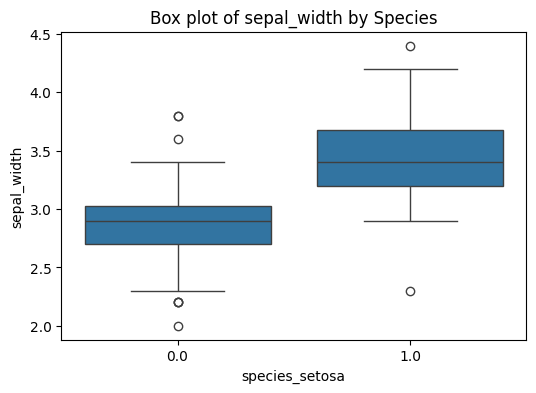

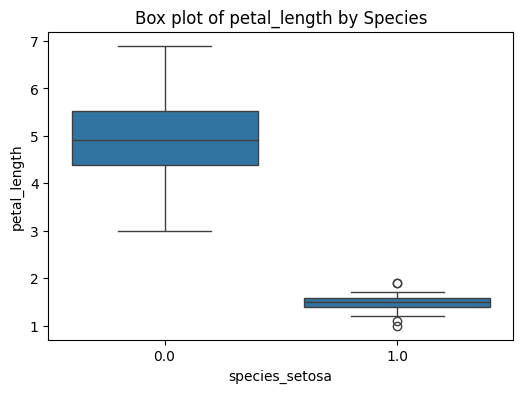

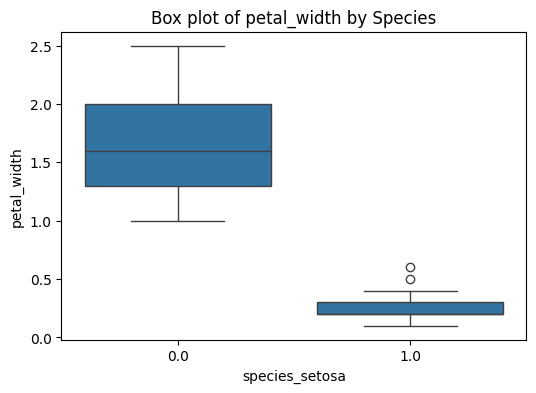

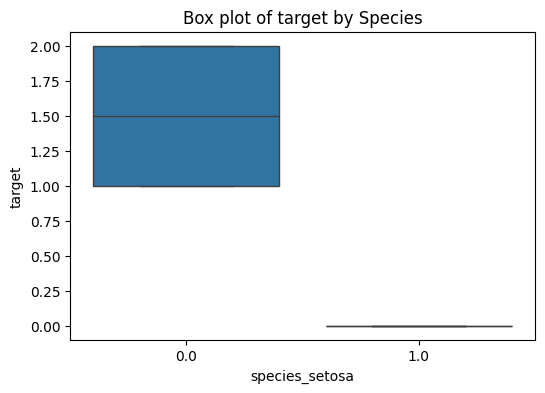

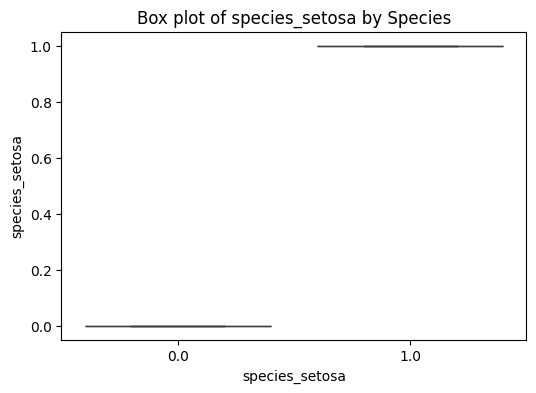

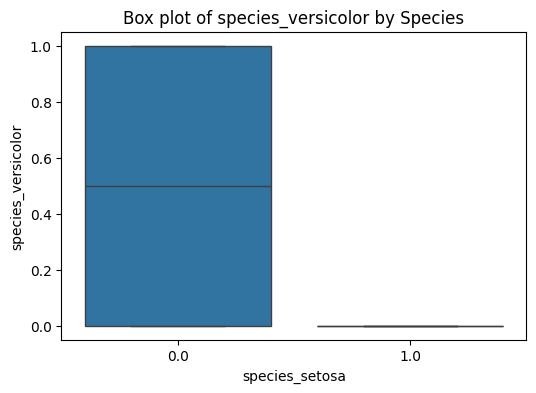

In [22]:
for column in df.columns[:-1]:  # Exclude the species column
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='species_setosa', y=column, data=df)
    plt.title(f'Box plot of {column} by Species')
    plt.show()

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['species_setosa','species_versicolor','species_virginica'])
y = df.loc[:, ['species_setosa', 'species_versicolor', 'species_virginica']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
classifier = DecisionTreeClassifier(random_state=42)

In [26]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [27]:
y_pred = classifier.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)

In [29]:
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [30]:
classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30
 samples avg       1.00      1.00      1.00        30

